In [1]:
# turn .data file into .csv file

##### write the first 36 lines on 1 line seperated by commas in new file
##### skip blank lines
##### write the data of a section of data on 1 line seperated by commas while replacing ';' with ',' in created file

In [2]:
with open('autorit.data') as aIn, open('autorit.csv', 'w') as aOut:
    for x in range(36):
        line = aIn.readline().rstrip()
        aOut.write(line)
        if x < 35:
            aOut.write(',')
    aOut.write('\n')
    for z in aIn:
        for y in range(2):
            line = aIn.readline()
            aOut.write(line.replace(';',',').rstrip('\n'))
            if y < 1:
                aOut.write(',')
        aOut.write('\n')

In [3]:
# Test graph

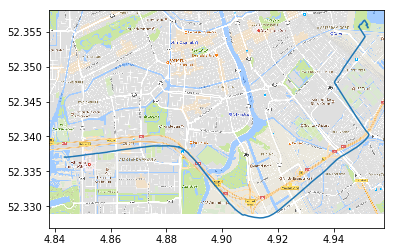

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# read data
data = pd.read_csv("autorit.csv")

# create figure
fig = plt.figure()

# create subplot
ax = fig.add_subplot(111)

# plot long and lat data
ax.plot(data["long"], data["lat"], zorder = 1)

# set background img
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
img = plt.imread("kaart.png")
ax.imshow(img, extent = [x0, x1, y0, y1], aspect = "auto", zorder = 0)

# save plot
plt.savefig("ride.png")

In [5]:
# get distance traveled

##### read the csv file
##### speed is in meters per second, measure points are made each second
##### add the speed of each measure point together to get Meters traveled
##### devide by 1000 and round to 2 decimals and print distance traveled in km

In [6]:
import math

data = pd.read_csv('autorit.csv')

print(round(data['speed'].sum()/1000, 2))

10.86


In [7]:
# print graph showing route and when speed is above 50kmh

##### create new row of data showing kmh
##### create mask of when speed is above 50kmh
##### create list of values True when speed is above 50kmh and False when below 50kmh
##### create list of dictionaries with each dictionary representing consequtive speeds of either above or below 50kmh
##### create the dictionaries with keys:values long: [longitudes], lat: [latitudes], and color: blue or red.
##### plot graph using each dictionary and putting in it's list of longitudes, list of latitudes, and color

330


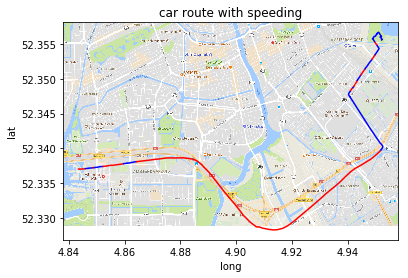

In [8]:
data['speed_kmh'] = data.apply(lambda row: row['speed'] * 3600 / 1000, axis=1)

red = data['speed_kmh'] > 50

color_list = data.apply(lambda row: False if row['speed_kmh'] <= 50 else True, axis=1).tolist()

print(data[red]['speed_kmh'].size)

segments = []
current_colour = None

for i in enumerate(color_list):
    if i[1] != current_colour:
        segment = {'long':[], 'lat':[], 'color':'red' if i[1] == True else 'blue'}
        segments.append(segment)
        current_colour = i[1]
    segments[-1]['long'].append(data.at[i[0], 'long'])
    segments[-1]['lat'].append(data.at[i[0], 'lat'])
    
    
# read data
data = pd.read_csv("autorit.csv")

# create figure
fig = plt.figure()

# create subplot
ax = fig.add_subplot(111)

# plot long, lat, and color data
for s in segments:
    ax.plot(s['long'], s['lat'], zorder = 1, color=s['color'])

# set labels
plt.xlabel('long')
plt.ylabel('lat')
plt.title('car route with speeding')

# set background img
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
img = plt.imread("kaart.png")
ax.imshow(img, extent = [x0, x1, y0, y1], aspect = "auto", zorder = 0)

# save plot
plt.savefig("ride.png")